<a href="https://colab.research.google.com/github/Oumy25/BoomBrick/blob/main/train_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP : **Exemple d'apprentissage supervisé :  créer un réseau de neurons qui apprendra à réaliser l'opération simulant le comportement de l'opérateur "XOR"**

### **Spécifications : **
Notre "opérateur XOR doit avoir :

*   2 entrées
*   1 sortie  (obéit à la table de vérité de fonction XOR)


1) Créer les vecteurs contenants des données d'entrée et de sortie

Le résultat doit être sous forme :

X= [[0. 0.]
    [0. 1.]
    [1. 0.]
    [1. 1.]]

Y= [0. 1. 1. 0.]

X est de type float32

In [65]:
# On va créer les données d'entrée et de sortie pour apprentissage
import numpy as np

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32) # entrées sont flottant
Y = np.array([0, 1, 1, 0], dtype=np.float32) # façon simple de faire un XOR

print("Valeurs numériques de x et y")
print ("X=",X)
print ("Y=",Y)

Valeurs numériques de x et y
X= [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Y= [0. 1. 1. 0.]


2) Visualiser les données utilisées pour apprentissage sous forme de "nuage de points". Cela permet de mieux voir quelle séparation de data nous attendons du réseau.

Voici l'exemple :

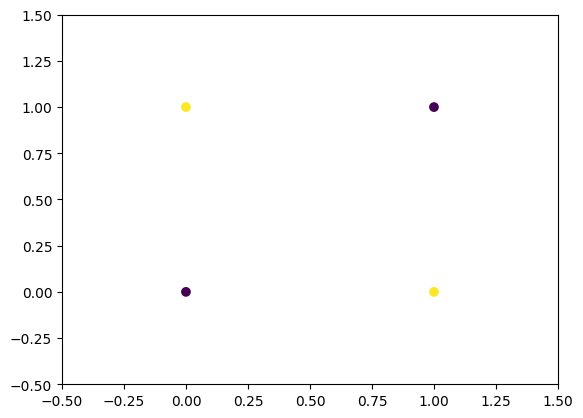

---



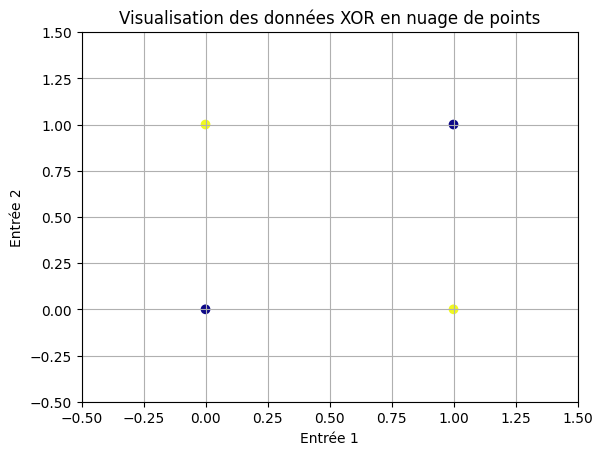

In [66]:
from matplotlib import pyplot as plt
# utiliser scatter et axis - fonction de visualisation des donnée de matplotlib
#... votre code ...
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.plasma)
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.title("Visualisation des données XOR en nuage de points")
plt.xlabel("Entrée 1")
plt.ylabel("Entrée 2")
plt.grid(True)
plt.show()

3) ✋ On n'a pas assez de données pour entrainer. On prépare une "augmentation de données" en créant des vecteurs d'entrée plus grands et en intégrant un peu de "bruit"

Objectif est d'obtenir un nuage de points comme ilustré ci-dessous 🇰
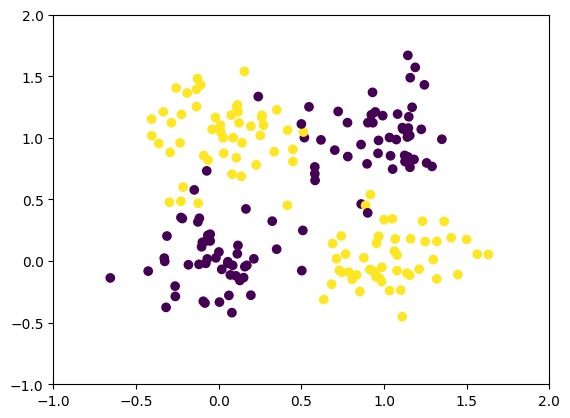

👆 Pour ceci, on va utiliser les fonctions suivantes
np.tile # copie les éléments de vecteurs n-fois pour augmenter sa taille

Pour générer le "bruit" :
t1 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))
t2 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))


 + affichage

(200, 2)
(200,)


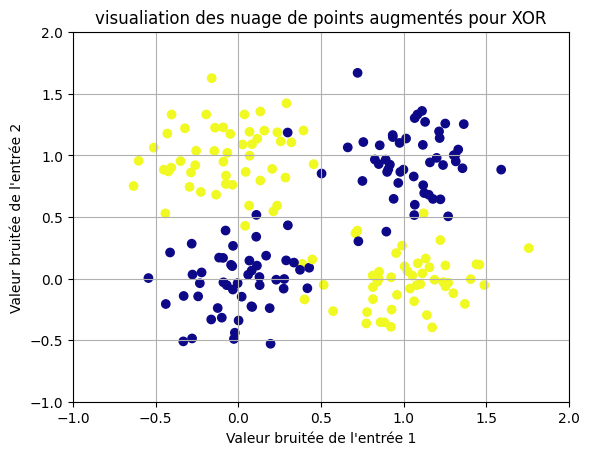

In [67]:
n = 50 # on va commencer avec un petit nombre, puis faire un test avec plus grand.
#... votre code ...
# augmentation de la taille
Xr = np.tile (X,(n,1))
Yr = np.multiply (Xr[:,0] != Xr[:,1],1.0) # la sortie correspondante

print(Xr.shape)
print(Yr.shape)

# Génération du bruit
t1 = np.array( 0. + 0.25 * np.random.randn(4*n, 1))
t2 = np.array( 0. + 0.25 * np.random.randn(4*n, 1))
Xr[:,0] = Xr [:,0] + t1[:,0]
Xr[:,1] = Xr [:,1] + t2[:,0]

plt.scatter(Xr[:, 0], Xr[:, 1], c=Yr , cmap=plt.cm.plasma)
plt.axis([-1, 2, -1, 2])
plt.xlabel("Valeur bruitée de l'entrée 1")
plt.ylabel("Valeur bruitée de l'entrée 2")
plt.title("visualiation des nuage de points augmentés pour XOR")
plt.grid(True)
plt.show()

4) ❓
Etes - vous prêt pour apprendre ?

👌 Commençons par préparer vérifier les formats des données (codage one-hot)

Vous devez obtenir :
0.0
[1. 0.]
[1. 0.]

In [68]:
# on fait import de la librairie KERAS from tensorflow qui nous permettra de coder le réseau et manipuler les données d'apprentissage
# on doit convertir la sortie en format attendu pas l'apprentissage (one-hot)
from tensorflow import keras
d = keras.utils.to_categorical(Y,num_classes=2)
ds = keras.utils.to_categorical(Yr, num_classes=2)
print (Yr[0])
print (d[0])
print (ds[0])

0.0
[1. 0.]
[1. 0.]


5) Séparer les data d'entrée/sortie en partie "entrainement" et "test"
Utilisez la fonction train_test_split

In [69]:
from sklearn.model_selection import train_test_split #sklearn est une librairie très utiles - gardez-la en mémoire

#... votre code ...
X_train, X_test, y_train, y_test = train_test_split(Xr, ds, test_size=0.20) # j'ai utilisé 20% pour le test et 80 % pour l'entrainement "

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 2) (40, 2) (160, 2) (40, 2)


______________________________________________________________
6) ⚠ ✅
C'est ici que l'on crée notre modèle du réseau
- séquentiel
couche d'entrée
2 couches denses cachées avec RELU
1 couche dense avec sigmoid

model.compile avec les paramètres ::
Optimiseur Adam
Loss categorical_crossentropy
Metrics = accuracy
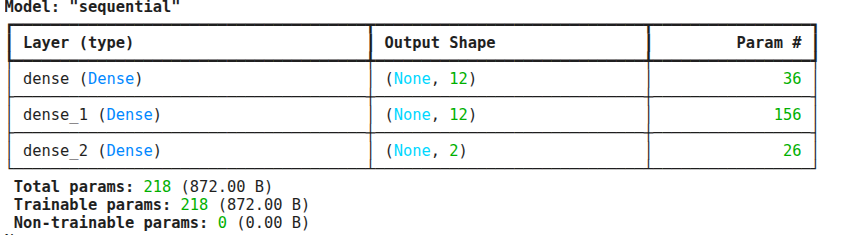


In [70]:
from keras.models import Sequential
from keras.layers import Dense
#... votre code ...

# création de "sequential model"
model = Sequential();
#création de la couche d'entrée
model.add(keras.Input(shape=(2,)))
#première couche
model.add(Dense(12, activation='relu'))
#Deuxième couche
model.add(Dense(12, activation='relu'))
#Couche de sortie
model.add(Dense(2, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print (model.summary())
print (model.optimizer.get_config())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218 (872.00 B)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

None
{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


7)  Lançons entrainement
model.fit

récupérer "history" d'entraimenet pour visualiser le déroulement de l'apprentissage



Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5232 - loss: 0.6911
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4788 - loss: 0.6881
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5537 - loss: 0.6741 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5318 - loss: 0.6717 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5742 - loss: 0.6657 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6187 - loss: 0.6621 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5583 - loss: 0.6618 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6116 - loss: 0.6464 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6242 - loss: 0.6399 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6821 - loss: 0.6351  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7302 - loss: 0.6337 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7900 - los

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656 (2.57 KB)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 438 (1.71 KB)

None


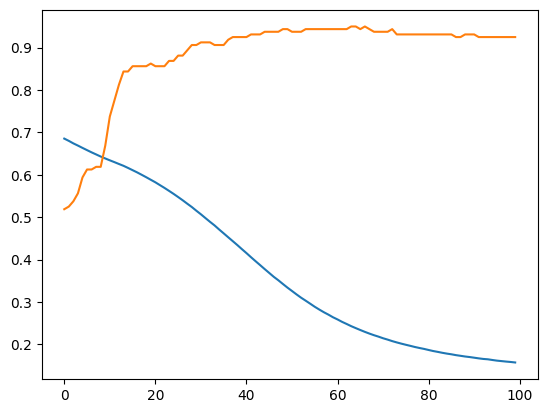

In [71]:

# entrainement du modèle
history = model.fit(X_train, y_train,epochs=100,verbose=1)
# Affichage du contenu de l'historique
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
print(model.summary())


8) Tracer une matrice de confusion en utilisant la partie des données "test"
Aide :  pensez à utiliser np.argmax pour choisir les bonnes prédictions
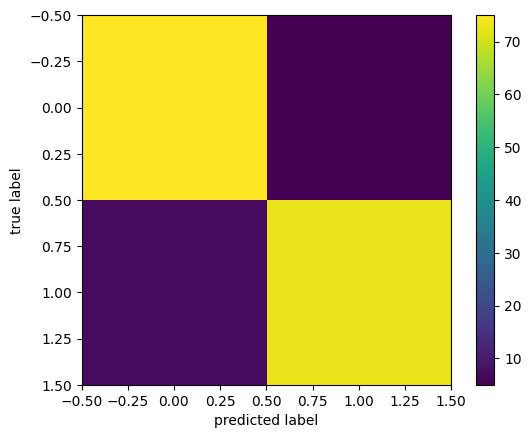

utilisez model.predict

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[23  2]
 [ 1 14]]


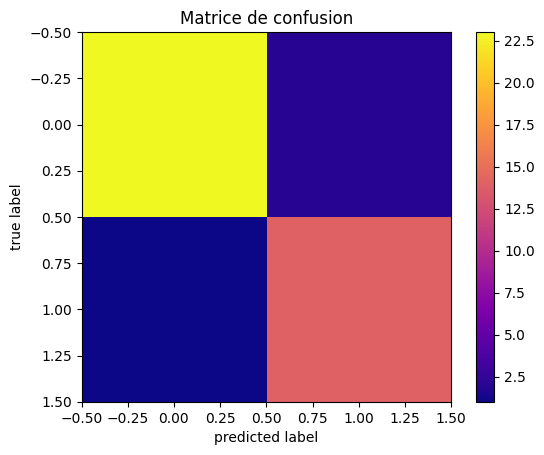

In [64]:
from sklearn.metrics import confusion_matrix
#... votre code ...
#prédictions sur les données de test (
Ypred = model.predict(X_test)
Ypred = np.argmax(Ypred, axis=1)
y_train = np.argmax(y_test, axis=1)

# Création de la matrice de confusion
CM = confusion_matrix(y_train, Ypred)
print(CM)

plt.imshow(CM, cmap=plt.cm.plasma)
plt.title("Matrice de confusion")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.show()

9) On va maintenant tracer les résultat superposé sur notre nuage de points.
On prépare d'abord l'espace pour tracer des lignes séparatrices des classes

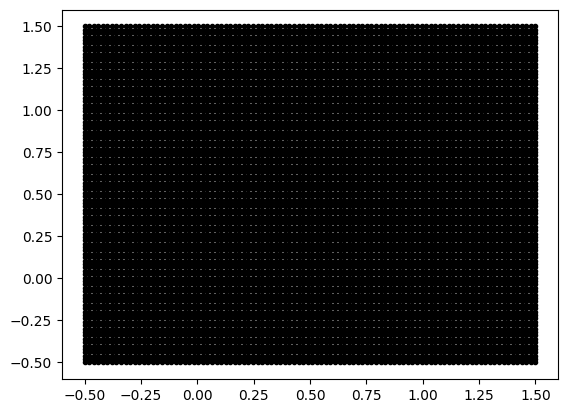

In [72]:
n = 100
nx, ny = (n, n)

x = np.linspace(-0.5, 1.5, nx)
y = np.linspace(-0.5, 1.5, ny)
xv, yv = np.meshgrid(x, y)

plt.plot(xv, yv, marker='.', color='k', linestyle='none')
plt.show()

Exemple de superposition
Question 1 : Testez des modèles NN différent pour observer le comportement de la séparation des classes
Question 2 : Testez des différentes tailles des données et l'accuracy de l'apprentissage.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


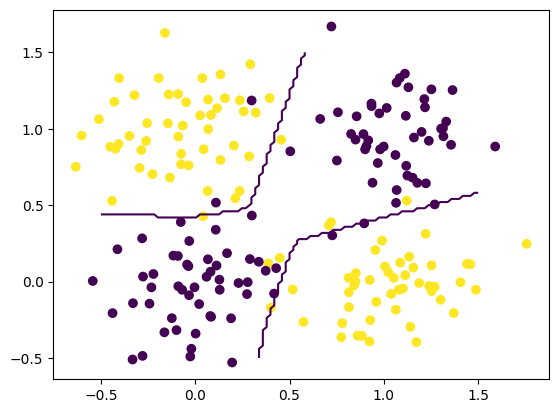

In [73]:
xvf = np.reshape(xv,(n*n,1))
yvf = np.reshape(yv,(n*n,1))

xx = np.concatenate((xvf,yvf),axis=1)
results= model.predict(xx)
yhat=np.argmax(results, axis=1)
yhat = np.reshape(yhat,(n,n))
plt.scatter (Xr[:,0],Xr[:,1],c=Yr)
yhat.shape
cs = plt.contour(xv,yv,yhat,[0.5])
